# 11781번 퇴근 시간 - Gold 1 

#### 알고리즘 분류 : 다익스트라

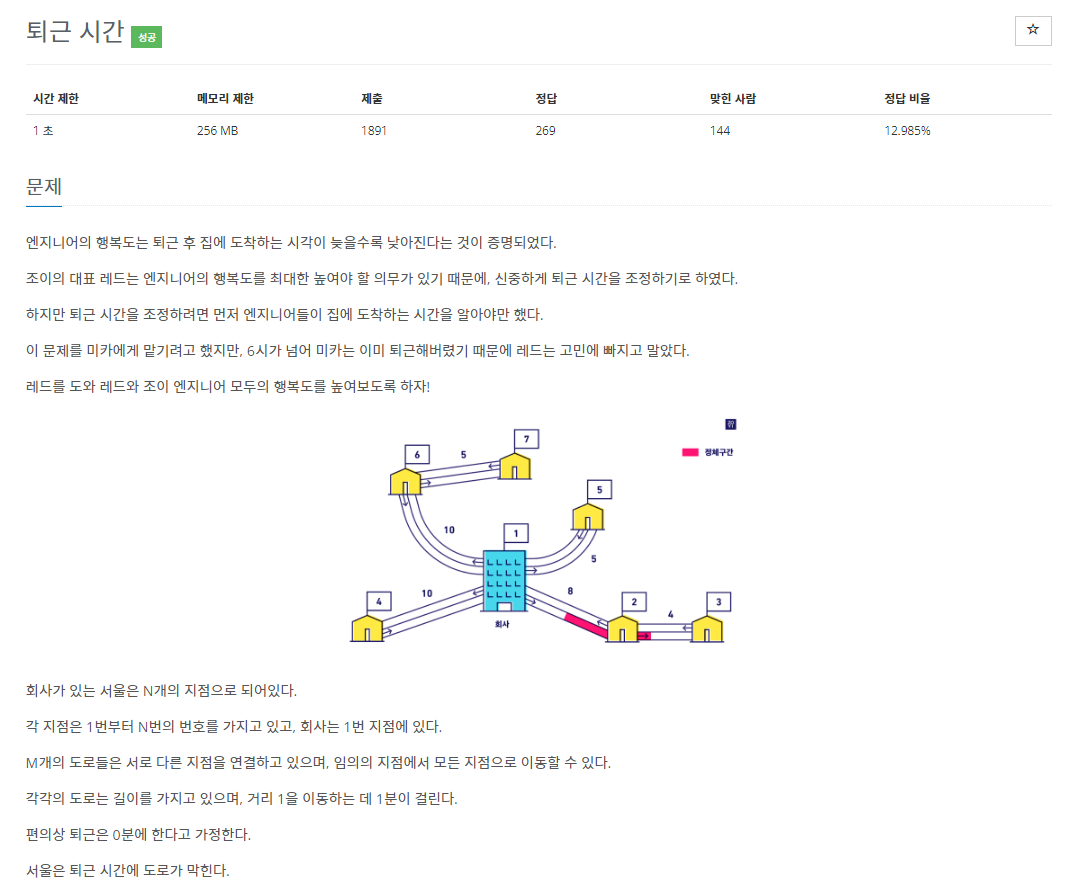
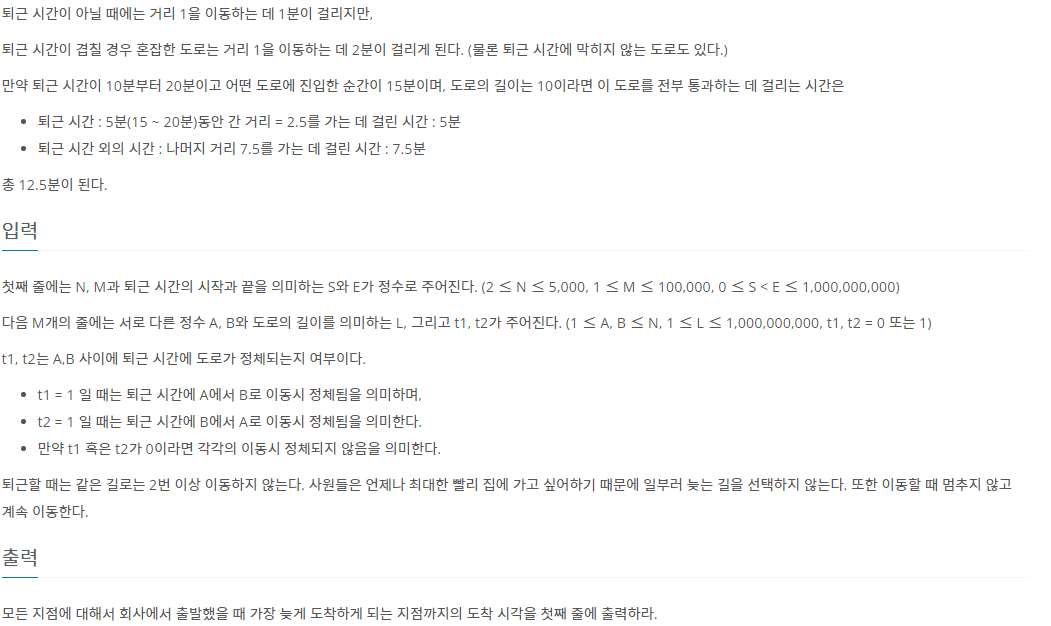

In [ ]:
import sys
from heapq import heappush, heappop

input = sys.stdin.readline

n, m, s, e = map(int, input().split())

graph = [[] for _ in range(n)]

delay = [[0] * n for _ in range(n)]
INF = float('inf')
for i in range(m):
    a, b, c, t1, t2 = map(int, input().split())
    graph[a - 1].append([b - 1, c])
    graph[b - 1].append([a - 1, c])

    delay[a - 1][b - 1] = t1
    delay[b - 1][a - 1] = t2

heap = []
visit = [[False] * n for _ in range(n)]
dist = [INF] * n
dist[0] = 0

heappush(heap, [0, 0])


def check(next_dist, next):
    if next_dist < dist[next]:
        dist[next] = next_dist
        heappush(heap, [next_dist, next])


while heap:
    current_dist, here = heappop(heap)

    for next, next_cost in graph[here]:

        if not delay[here][next]:
            next_dist = current_dist + next_cost
            check(next_dist, next)
            continue
        else:

            if current_dist >= e or current_dist + next_cost <= s:
                next_dist = current_dist + next_cost
                check(next_dist, next)
                continue
            elif s <= current_dist < e:
                delay_dist = (e - current_dist) / 2
                if next_cost <= delay_dist:
                    next_dist = current_dist + (next_cost * 2)
                    check(next_dist, next)
                    continue
                else:
                    next_dist = (delay_dist * 2) + (next_cost - delay_dist) + current_dist
                    check(next_dist, next)
                    continue
            elif current_dist < s:
                before_delay = s - current_dist
                delay_dist = (e - s) / 2

                if next_cost <= before_delay + delay_dist:
                    next_dist = current_dist + before_delay + ((next_cost - before_delay) * 2)
                    check(next_dist, next)
                    continue
                else:
                    next_dist = current_dist + before_delay + (delay_dist * 2) + (next_cost - before_delay - delay_dist)
                    check(next_dist, next)
                    continue
max_dist = max(dist)

if max_dist == int(max_dist):
    print('%.0f' % max_dist)
else:
    print('%.1f' % max_dist)
